# 1. Note

In this lab, we used lots of classifiers to solve classification problems. 

We also compared results of the different techniques. 

In the end, we answerd the research problems in Lab1.

# 2. Preparation

## 2.1 Load  required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LG
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier as KNN

In [3]:
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, roc_curve,auc,f1_score

## 2.2 Load data

In [7]:
path = 'Select_Healthcare-Dataset-Stroke-Data.csv'
df = pd.read_csv(path)

## 2.3 Finding out basic information 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5109 non-null   float64
 1   gender                 5109 non-null   int64  
 2   work_type              5109 non-null   int64  
 3   Residence_type         5109 non-null   int64  
 4   smoking_status         5109 non-null   int64  
 5   avg_glucose_level_cut  5109 non-null   int64  
 6   bmi_rep                5109 non-null   float64
 7   stroke                 5109 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 319.4 KB


In [9]:
df.shape

(5109, 8)

In [10]:
df.isnull().sum()

age                      0
gender                   0
work_type                0
Residence_type           0
smoking_status           0
avg_glucose_level_cut    0
bmi_rep                  0
stroke                   0
dtype: int64

In [11]:
df.duplicated().sum()

16

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.head()

,age,gender,work_type,Residence_type,smoking_status,avg_glucose_level_cut,bmi_rep,stroke
0,67.0,0,0,1,1,5,36.600000,1
1,80.0,0,0,0,0,3,32.500000,1
2,81.0,0,0,1,1,4,29.000000,1
3,74.0,0,0,0,0,1,27.400000,1
4,78.0,0,0,1,255,5,27.247222,1


## 2.4 Imbalanced or not

In [14]:
is_stroke=df['stroke'].value_counts()
is_stroke

0    4844
1     249
Name: stroke, dtype: int64

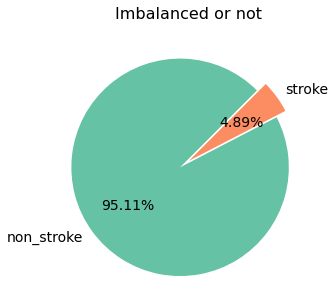

In [15]:
plt.figure(figsize = (5,5))
color = sns.color_palette('Set2')[0:2]

plt.pie(is_stroke,startangle = 45,explode = [0.1,0],colors = color,
        labels =['non_stroke','stroke'],
        autopct = '%.2f%%',textprops = {'fontsize':14})

plt.title('Imbalanced or not',fontsize = 16)
plt.show()

Our target class is quite unimbalance, only 249 strokes are in our dataset which totals about 5000 - around 1 in 20. 

But we can fix this with SMOTE.

## 2.5 Preparing Data

In [16]:
X  = df.drop(['stroke'],axis=1)
y = df['stroke']

### 2.5.1 SMOTE

In [17]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,y)

### 2.5.2 split data to train and test

In [18]:
 Xs_train, Xs_test,ys_train,ys_test = train_test_split(X_smote,y_smote,test_size = 0.4, random_state = 40)

In [19]:
 X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4,random_state = 40,stratify = y)

# 3. Hold out

## 3.1 Define performance evaluation function

In [20]:
def evaluator(estimators,X,y):
    columns = ['accuracy','f1','acu']
    performance = pd.DataFrame(columns = columns)
    for i in range(len(estimators)):
        X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.4,stratify = y)
        model = estimators[i].fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)
        row = pd.DataFrame([[estimators[i].score(X_test,y_test),f1_score(y_test,y_pred),
                              roc_auc_score(y_test,y_pred)]],index= ['{}'.format(classifiers[i])],
                               columns = columns)
        performance = performance.append(row)
    return performance

## 3.2 Performance of Classifiers

In [21]:
gNB = GaussianNB()
cNB = CategoricalNB()
bNB = BernoulliNB()
tree = DT()
rf = RF()
lg = LG(max_iter=10000)
svm = SVM(probability=True)
knn = KNN()
classifiers = [gNB,cNB,bNB,tree,rf,lg,svm,knn]
classifiers

[GaussianNB(),
 CategoricalNB(),
 BernoulliNB(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 LogisticRegression(max_iter=10000),
 SVC(probability=True),
 KNeighborsClassifier()]

In [22]:
evaluator(classifiers,X,y)

,accuracy,f1,acu
GaussianNB(),0.894995,0.230216,0.622332
CategoricalNB(),0.950932,0.000000,0.500000
BernoulliNB(),0.950932,0.000000,0.500000
DecisionTreeClassifier(),0.907262,0.167401,0.567136
RandomForestClassifier(),0.947498,0.018349,0.502936
LogisticRegression(max_iter=10000),0.950932,0.000000,0.500000
SVC(probability=True),0.950932,0.000000,0.500000
KNeighborsClassifier(),0.946516,0.018018,0.502420


In [23]:
evaluator(classifiers,X_smote,y_smote)

,accuracy,f1,acu
GaussianNB(),0.732456,0.784183,0.732456
CategoricalNB(),0.795666,0.811608,0.795666
BernoulliNB(),0.651961,0.662497,0.651961
DecisionTreeClassifier(),0.899123,0.901931,0.899123
RandomForestClassifier(),0.927761,0.929684,0.927761
LogisticRegression(max_iter=10000),0.778638,0.790015,0.778638
SVC(probability=True),0.777090,0.795938,0.777090
KNeighborsClassifier(),0.879515,0.890504,0.879515


We can find that data not processed by SOMTE have higher accuracy but lower F1 values, which means imbalanced data have lower recall.

## 3.3 ROC of classifiers

In [24]:
def ROC(classifiers,X,y):
    plt.figure(figsize = (8,6))
    for i in range(len(classifiers)):
        X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.4,stratify = y)
        model = classifiers[i].fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        fpr_,tpr_,_ = roc_curve(y_test,y_pred_prob)
        auc = roc_auc_score(y_test,y_pred).round(2)
        plt.plot(fpr_,tpr_, lw = 2, alpha = 0.5,label = '{}(area={})'.format(classifiers[i],auc))
    plt.plot([0,1],[0,1],color ='black',linestyle = '--')
    plt.legend(loc = 'lower right')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1-specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

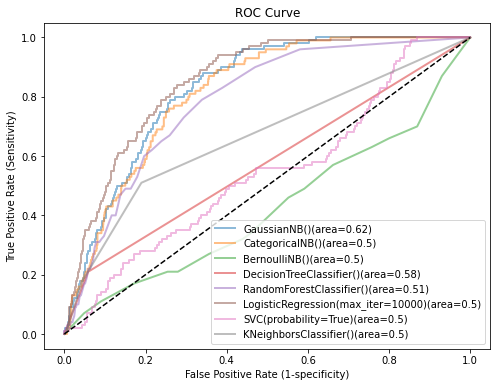

In [25]:
ROC(classifiers,X,y)

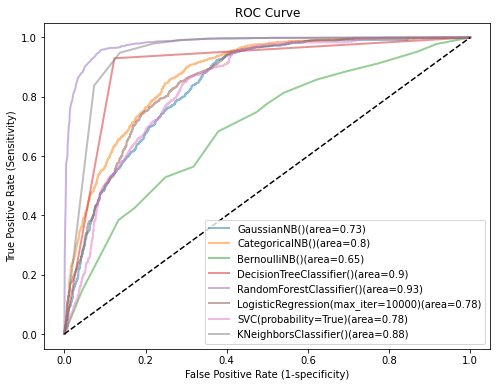

In [26]:
ROC(classifiers,X_smote,y_smote)

The ROC curve also confirms our view that the data after SMOTE makes the model have a better ROC area.

# 4. k-fold Cross Validation

In [27]:
def KFoldCV(classifier,X,y,cv):
    score = ['accuracy','f1','roc_auc']
    cv_= cross_validate(classifier,X,y,cv = cv, scoring = score)
    
    cv_df = pd.DataFrame(cv_)
    cv_df_ = pd.DataFrame(columns = cv_df.columns)
    
    cv_df_.loc['max'] = cv_df.max().round(2)
    cv_df_.loc['min'] = cv_df.min().round(2)
    cv_df_.loc['mean'] = cv_df.mean().round(2)
    cv_df_.loc['std'] = cv_df.std().round(2)
    return cv_df_

In [28]:
KFoldCV(rf,X_smote,y_smote,3)

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
max,0.47,0.11,0.93,0.93,0.99
min,0.45,0.10,0.80,0.82,0.92
mean,0.46,0.11,0.89,0.90,0.96
std,0.01,0.00,0.08,0.06,0.04


In [29]:
KFoldCV(rf,X_smote,y_smote,5)

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
max,0.52,0.08,0.96,0.96,0.99
min,0.48,0.07,0.85,0.86,0.95
mean,0.49,0.07,0.92,0.92,0.98
std,0.02,0.00,0.04,0.04,0.02


In [30]:
KFoldCV(rf,X_smote,y_smote,10)

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
max,0.56,0.05,0.97,0.97,0.99
min,0.52,0.05,0.82,0.82,0.92
mean,0.53,0.05,0.93,0.93,0.98
std,0.01,0.00,0.04,0.04,0.02


In [31]:
KFoldCV(knn,X_smote,y_smote,3)

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
max,0.01,0.17,0.89,0.90,0.95
min,0.01,0.15,0.86,0.88,0.93
mean,0.01,0.16,0.88,0.89,0.94
std,0.00,0.01,0.02,0.01,0.01


In [32]:
KFoldCV(knn,X_smote,y_smote,5)

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
max,0.02,0.10,0.90,0.91,0.96
min,0.01,0.09,0.86,0.88,0.93
mean,0.02,0.09,0.88,0.90,0.95
std,0.00,0.00,0.01,0.01,0.01


In [33]:
KFoldCV(knn,X_smote,y_smote,10)

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
max,0.02,0.06,0.92,0.92,0.97
min,0.01,0.05,0.87,0.88,0.93
mean,0.02,0.05,0.89,0.90,0.95
std,0.00,0.00,0.02,0.01,0.01


In [34]:
def cv_ROC(classifier,x,y,cv):
    cv_= StratifiedKFold(n_splits=cv,shuffle=False)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    plt.figure(figsize =(7,5))
    for train,test in cv_.split(x,y):
        prediction = classifier.fit(x.iloc[train],y[train]).predict_proba(x.iloc[test])[:,1]
        fpr_cv, tpr_cv, t_cv= roc_curve(y[test], prediction)
        tprs.append(np.interp(mean_fpr, fpr_cv, tpr_cv))
        roc_auc_cv = auc(fpr_cv, tpr_cv)
        aucs.append(roc_auc_cv)
        plt.plot(fpr_cv, tpr_cv, lw=2, alpha=0.5, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_cv))
        i= i+1
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    plt.xlabel('False Positive Rate (1-specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc = 'lower right')
    plt.show()

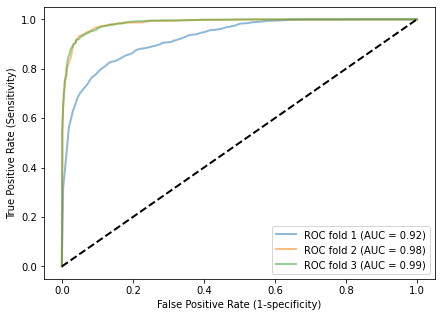

In [35]:
cv_ROC(rf,X_smote,y_smote,3)

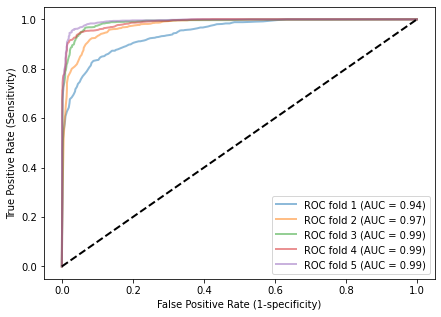

In [36]:
cv_ROC(rf,X_smote,y_smote,5)

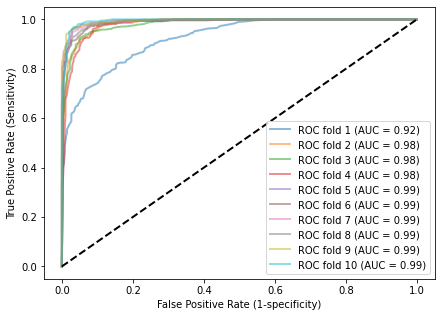

In [37]:
cv_ROC(rf,X_smote,y_smote,10)

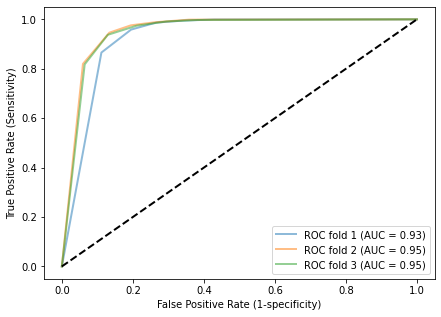

In [38]:
cv_ROC(knn,X_smote,y_smote,3)

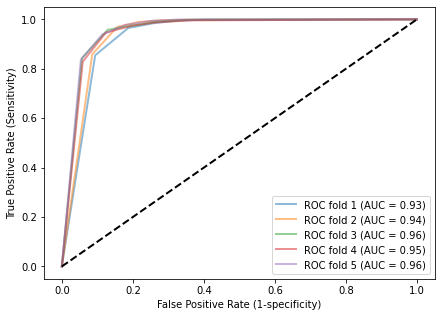

In [39]:
cv_ROC(knn,X_smote,y_smote,5)

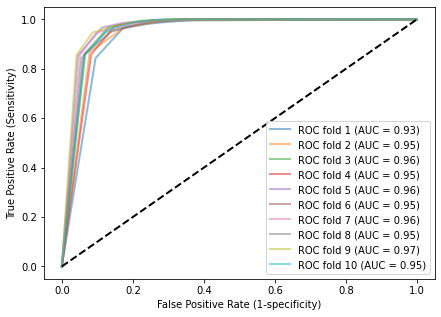

In [40]:
cv_ROC(knn,X_smote,y_smote,10)

# 5. Prediction

After the above model evaluation and selection, we choose three methods to predict.

### confusion_matrix

In [41]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### ROC Curve

In [42]:
def plot_roc(model):
    y_score = model.predict_proba(X_test)[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr,tpr)

    plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
    plt.plot(fpr, tpr, color='black', lw = 1)
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.show()

### KS Curve

In [43]:
def plot_ks(y_test, model, positive_flag):
    y_test.index = np.arange(len(y_test))
  
    y_score = model.predict_proba(X_test)[:,1]
    
    target_data = pd.DataFrame({'y_test':y_test, 'y_score':y_score})
    
    target_data.sort_values(by = 'y_score', ascending = False, inplace = True)
    
    cuts = np.arange(0.1,1,0.1)
    
    index = len(target_data.y_score)*cuts
    scores = np.array(target_data.y_score)[index.astype('int')]
  
    Sensitivity = []
    Specificity = []
    for score in scores:
      
        positive_recall = target_data.loc[(target_data.y_test == positive_flag) & (target_data.y_score>score),:].shape[0]
        positive = sum(target_data.y_test == positive_flag)
        
        negative_recall = target_data.loc[(target_data.y_test != positive_flag) & (target_data.y_score<=score),:].shape[0]
        negative = sum(target_data.y_test != positive_flag)
        Sensitivity.append(positive_recall/positive)
        Specificity.append(negative_recall/negative)

    plot_data = pd.DataFrame({'cuts':cuts,'y1':1-np.array(Specificity),'y2':np.array(Sensitivity), 
                              'ks':np.array(Sensitivity)-(1-np.array(Specificity))})
   
    max_ks_index = np.argmax(plot_data.ks)
    plt.plot([0]+cuts.tolist()+[1], [0]+plot_data.y1.tolist()+[1], label = '1-Specificity')
    plt.plot([0]+cuts.tolist()+[1], [0]+plot_data.y2.tolist()+[1], label = 'Sensitivity')
  
    plt.vlines(plot_data.cuts[max_ks_index], ymin = plot_data.y1[max_ks_index], 
               ymax = plot_data.y2[max_ks_index], linestyles = '--')

    plt.text(x = plot_data.cuts[max_ks_index]+0.01,
             y = plot_data.y1[max_ks_index]+plot_data.ks[max_ks_index]/2,
             s = 'KS= %.2f' %plot_data.ks[max_ks_index])
  
    plt.legend()

    plt.show()

## 5.1 DT

In [44]:
tree_model_pred = tree.fit(Xs_train,ys_train)  

In [45]:
tree_pred = tree_model_pred.predict(X_test)
tree_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
tree_pred_prob = tree_model_pred.predict_proba(X_test).round(4)
tree_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])


The classification report for Decision Tree is:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1938
           1       0.49      0.88      0.63       100

    accuracy                           0.95      2038
   macro avg       0.74      0.92      0.80      2038
weighted avg       0.97      0.95      0.96      2038



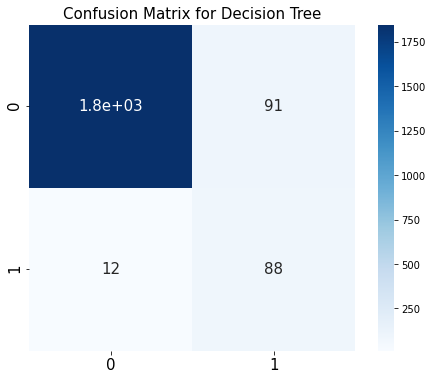

In [47]:
generate_results(tree, tree_pred, 'Decision Tree')

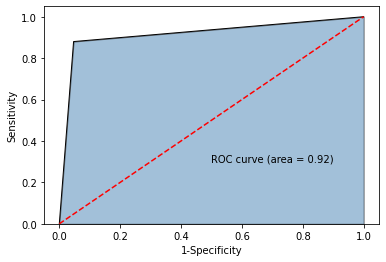

In [48]:
plot_roc(tree)

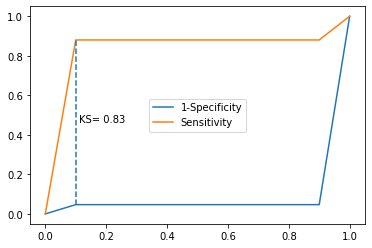

In [49]:
plot_ks(y_test, tree, positive_flag=1)

## 5.2 RF

In [50]:
rf_model_pred = rf.fit(Xs_train,ys_train)  

In [51]:
rf_pred = rf_model_pred.predict(X_test)
rf_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
rf_pred_prob = rf_model_pred.predict_proba(X_test).round(4)
rf_pred_prob

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.73, 0.27],
       ...,
       [0.98, 0.02],
       [0.44, 0.56],
       [0.91, 0.09]])


The classification report for Random Forest is:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1938
           1       0.56      0.89      0.68       100

    accuracy                           0.96      2038
   macro avg       0.78      0.93      0.83      2038
weighted avg       0.97      0.96      0.96      2038



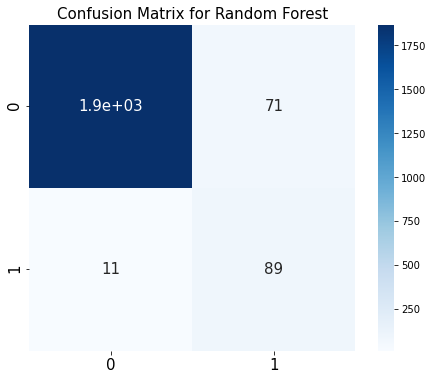

In [53]:
generate_results(rf, rf_pred, 'Random Forest')

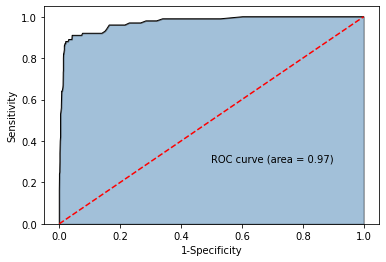

In [54]:
plot_roc(rf)

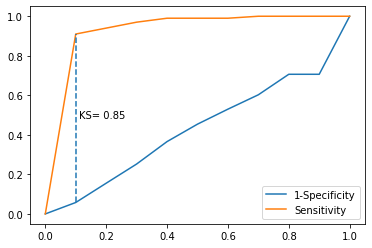

In [55]:
plot_ks(y_test, rf, positive_flag=1)

## 5.3 KNN

In [56]:
from sklearn import model_selection
from sklearn import neighbors

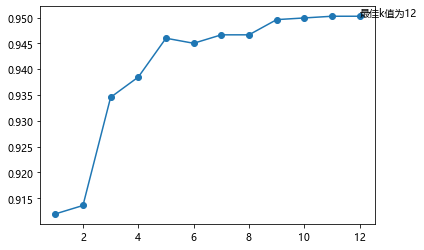

In [57]:
K = np.arange(1,np.ceil(np.log2(df.shape[0]))).astype(int)
accuracy = []

for k in K:
    
    cv_result = model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance'), 
                                                X_train, y_train, cv = 10, scoring='accuracy')
    accuracy.append(cv_result.mean())  
arg_max = np.array(accuracy).argmax()

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(K, accuracy)
plt.scatter(K, accuracy)
plt.text(K[arg_max], accuracy[arg_max], '最佳k值为%s' %int(K[arg_max]))
plt.show()

In [58]:
knn_class = neighbors.KNeighborsClassifier(n_neighbors = 12, weights = 'distance')

In [59]:
knn_model_pred = knn_class.fit(Xs_train,ys_train) 

In [60]:
knn_pred = knn_model_pred.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [61]:
knn_pred_prob = knn_model_pred.predict_proba(X_test).round(4)
knn_pred_prob

array([[1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       ...,
       [1.    , 0.    ],
       [0.2764, 0.7236],
       [0.3537, 0.6463]])


The classification report for KNN is:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1938
           1       0.36      0.99      0.52       100

    accuracy                           0.91      2038
   macro avg       0.68      0.95      0.74      2038
weighted avg       0.97      0.91      0.93      2038



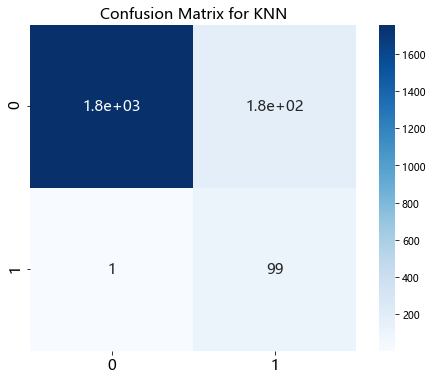

In [62]:
generate_results(knn_class, knn_pred, 'KNN')

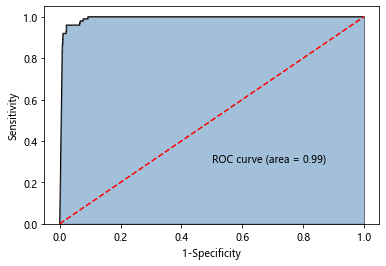

In [63]:
plot_roc(knn_class)

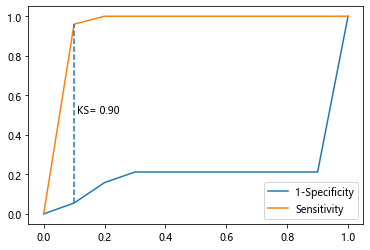

In [64]:
plot_ks(y_test, knn_class, positive_flag=1)

# 6. Conclusion and Discussion

(1) what kind of characteristics are existed in stroke？

(2) what kind of features will influence stroke？

(3) which algorithm should be chosen as predictor considering effectiveness, efficiency and stability？

## 6.1 What kind of characteristics are existed in stroke？

Based on the previous EDA lab, it seems clear that Age is a big factor in stroke patients - the older you get the more at risk you are.

Though less obvious, there are also differences in Avg. Glucose Levels and BMI.

## 6.2  What kind of features will influence stroke？

### DT

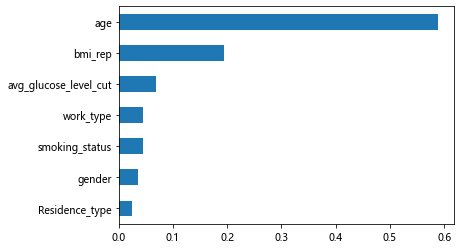

In [65]:
importance = tree.feature_importances_
Impt_Series = pd.Series(importance, index = Xs_train.columns)
Impt_Series.sort_values(ascending = True).plot(kind='barh')
plt.show()

### RF

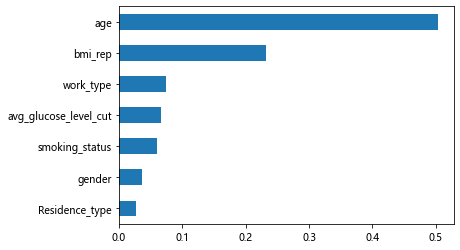

In [66]:
importance = rf.feature_importances_
Impt_Series = pd.Series(importance, index = Xs_train.columns)
Impt_Series.sort_values(ascending = True).plot(kind='barh')
plt.show()

By looking at the features most commonly used in the prediction model we find out which features are the most important.

Both DT and RF are telling us that age and bmi  are the most important factors in our model.As Age increases, the risk of having a stroke increases too. The older you get, the more at risk you get.

DT tells us that avg_glucose_level and smoking_status are also playing an important role, while RF thinks work_type has a bigger role. 
Gender and Residence_type were surprisingly low in the importance rankings.

## 6.3 Which algorithm should be chosen as predictor considering effectiveness,efficiency and stability?

In this part,DecisionTree,RandomForest and KNN classifiers are used to predict those who will suffer a stroke.

After using smote to oversample the minority data, all classifiers are doing better at predicted class 1 than based on original data.

According to accuracy and f1 score of the 8 classifiers, random forest is the best one,decision tree and KNN are the next.

Because means of accuracy and f1 score among hold-out, 3-fold cross validation, 5-fold cross validation and 10-fold cross validation of RF and KNN based on smote data are so closed to each other, we can conclude that the model is independent of the particular folds used for training.

Using the mean of 10 fold cross-validation based on smote data, we can conclude that we expect the model to be around 93% accurate and f1 on average of random forest and 90% accurate and f1 on average of random forest of knn.

F1 of random forest based on smote data using hold-out is 93%, but the mean cross-validation f1 is 93%. So, the 10-fold cross-validation does not result in performance improvement for RF.The KNN is same.

In the last evaluation,KNN has higher recall,but RF has higher accuracy and f1 score.Those two models all behaved very well!